<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Linear_Regresson_on_EUR_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise preditiva utilizando ML com Regressão Linear para pever oscilações no par EUR/USD

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimage.freepik.com%2Ffree-vector%2Fstock-market-forex-trading-graph-graphic-concept_73426-94.jpg&f=1&nofb=1&ipt=cd40318cc1b9cf698d60c3dd51ac5b863ad37b7e60f0ea54bec11d106e55e05d&ipo=images' width='300'>

## Breve introdução:

> **O que é EUR/USD:** Abreviação para a taxa de câmbio entre o Euro e o Dólar Americano. Isso significa quantos dólares americanos você pode comprar com um euro. Por exemplo, se a taxa de câmbio EUR/USD é de 1,20, isso significa que 1 euro equivale a 1,20 dólares americanos. Esta taxa é usada como uma medida da relação entre as duas moedas e é amplamente utilizada como uma referência para o comércio e investimento.

> **O que é Machine Learning (ML):** Machine Learning é um campo da inteligência artificial que dá aos computadores a capacidade de aprender sem serem explicitamente programados. Ele se baseia em algoritmos e estatísticas para permitir que os computadores aprendam com dados, e melhorem suas habilidades a medida que adquirem novos dados. 

> **O que é Regressão Linear:** Método estatístico que é usado para estabelecer a relação entre uma variável dependente e uma ou mais variáveis independentes. É um tipo de análise de regressão que é usado para prever o valor de uma variável dependente (também chamada de variável alvo) com base em um conjunto de variáveis independentes. A regressão linear é baseada na hipótese de que existe uma relação linear entre as variáveis. Ele é representado por uma equação da reta, onde a inclinação é a chamada de coeficiente de regressão e a intercepção é a chamada constante. A regressão linear é amplamente utilizada em diversas áreas como economia, finanças, medicina, psicologia, entre outras.



# Sobre esse estudo:

<img src='https://github.com/LucasPequenoSterzeck/Machine_Learning_LPS/blob/1cd2810067c045a3bd8faf4ae2783bba6b0508fb/Regressao_Linear_EUR_USD/Atencao_Rotulo.png?raw=true' width='250'>

Esse estudo é destinado somente a exploração do modelo de Regressão Linear frente a dados históricos do par EUR/USD. Reforço que se trata explicitamente de um estudo (E em minha opinião um divertido experimento), **ou seja, não se trata de nenhuma recomendação ou indicação.**

# Sumário

As etapas gerais que envolvem uma análise de regressão linear com Python incluem:

> **1º Coleta de dados:** Recolher e preparar o conjunto de dados que será usado para a análise. Isso pode incluir a limpeza de dados, o tratamento de valores ausentes e a normalização de variáveis.

> **2º Análise exploratória de dados:** Utilizando ferramentas como gráficos e tabelas para entender a distribuição e relações entre as variáveis no conjunto de dados.

> **3º Seleção de características:** Escolha as variáveis independentes (características) que serão usadas na modelagem.

> **4º Treinamento do modelo:** Utilizando a biblioteca de machine learning do Python, como scikit-learn, para treinar o modelo de regressão linear com o conjunto de dados de treinamento.

> **5º Validação do modelo:** Utilizando métricas de avaliação, como o erro quadrático médio (MSE) ou o coeficiente de determinação (R²), para avaliar a precisão do modelo e verificar se ele generaliza bem para dados desconhecidos.

> **6º Interpretação dos resultados:** Interpretando os coeficientes de regressão e sua significância estatística, e utilizando os resultados para fazer previsões e tomar decisões.

> **7º Implementação:** Utilizando o modelo treinado para fazer previsões em novos conjuntos de dados.

# 1º Passo - Coleta de dados

Para nossa coleta de dados iremos utilizar uma base de dados histórica EUR/USD que poderá ser extraída diretamente pelo site [myfxbook](https://www.myfxbook.com/forex-market/currencies/EURUSD-historical-data).

Eu já deixei uma base de Jan/22 até 13/Fev/23 salva em meu github, [você pode baixá-lo nesse link se quiser.](https://raw.githubusercontent.com/LucasPequenoSterzeck/Machine_Learning_LPS/main/Regressao_Linear_EUR_USD/LR_EUR_USD.csv)

In [2]:
# Importdando bibliotecas para dados
import pandas as pd

# Importando dados (Usamos header=1 devido ao cabeçalho estava na segunda linha)
df = pd.read_csv(r'https://raw.githubusercontent.com/LucasPequenoSterzeck/Machine_Learning_LPS/main/Regressao_Linear_EUR_USD/LR_EUR_USD.csv', header=1, index_col=False)

# Visualizando dados
df

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,01/13/2023 00:00,1.08442,1.08681,1.07803,1.08321,-12.1,-0.11
1,01/12/2023 00:00,1.07538,1.08667,1.07293,1.08506,96.8,0.89
2,01/11/2023 00:00,1.07324,1.07765,1.07256,1.07564,24.0,0.22
3,01/10/2023 00:00,1.07282,1.07595,1.07122,1.07342,6.0,0.06
4,01/09/2023 00:00,1.06387,1.07607,1.06371,1.07327,94.0,0.88
...,...,...,...,...,...,...,...
264,01/07/2022 00:00,1.12950,1.13646,1.12898,1.13592,64.2,0.57
265,01/06/2022 00:00,1.13109,1.13318,1.12847,1.12982,-12.7,-0.11
266,01/05/2022 00:00,1.12841,1.13465,1.12771,1.13125,28.4,0.25
267,01/04/2022 00:00,1.12952,1.13226,1.12724,1.12878,-7.4,-0.07


# 2º Passo - Análise exploratória dos dados

Aqui iremos visualizar as informações presentes em noss banco de dados, não seremos incisivos, iremos somente enteder o dados e visualizá-lo de forma simples.

## Sobre os dados que importamos:

Estrutura: Temos 269 linhas e 7 colunas. Os dados estão organizados em dias, cada dia terá sua respectiva:
- Date: Data
- Open: Abertura
- High: Alta
- Low: Baixa
- Close: Fechamento
- Change (Pips): Variação em pontos
- Change (%): Variação em percentual




In [3]:
# Visualizando formato das variáveis
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Change(Pips)    float64
Change(%)       float64
dtype: object

In [4]:
# Variável(Coluna) Date não está em formato correto! Vamos corrigi-lá abaixo:

df.Date = pd.to_datetime(df.Date)

# Verificando novamente, agora vemos que Date está em formato data ( datetime64[ns] )
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Change(Pips)           float64
Change(%)              float64
dtype: object

Visualizando variável do fechamento ao longo do período


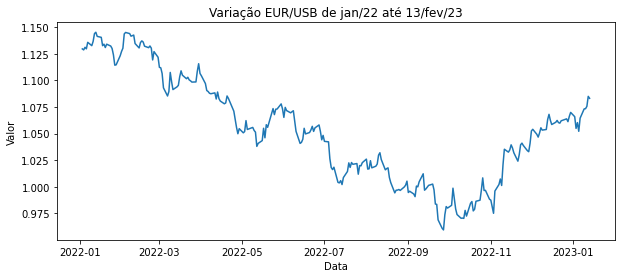


Visualizando candles dia ao longo do período


In [5]:
# Biblioteca para visualização (Plotagem)
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Visualizando variações:
print('Visualizando variável do fechamento ao longo do período')
plt.figure(figsize=(10,4))
plt.title('Variação EUR/USB de jan/22 até 13/fev/23')
plt.ylabel('Valor')
plt.xlabel('Data')
plt.plot(df.Date.values, df.Close.values)
plt.show()

# Visualizando candle's
print('\nVisualizando candles dia ao longo do período')
go.Figure(data=[go.Candlestick(
                x=df.Date.values,
                open=df.Open.values,
                high=df.High.values,
                low=df.Low.values,
                close=df.Close.values)]).show()

Antes de encerrarmos esse tópico, gostaria de somente convídá-lo a visualizar gráficos de outras fontes de dados e verificar se estamos realmente vendo a mesma informação do mercado... 

Se não quiser pesquisar eu já dei uma olhadinha no [google finanças no EUR/USD](https://www.google.com/finance/quote/EUR-USD?sa=X&ved=2ahUKEwiL-svdpMf8AhWQJrkGHXdfBlMQmY0JegQIBxAc&window=1Y) e vi no período 15/01/22 até 13/01/23 praticamente a mesma informação que estamos vendo acima e foram extraídas do [myfxbook](https://www.myfxbook.com/forex-market/currencies/EURUSD-historical-data), veja abaixo:

<img src='https://github.com/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Regressao_Linear_EUR_USD/GoogleFinance_EUR_USD.png?raw=true' width='700'>

[Imagem em maior resolução.](https://github.com/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Regressao_Linear_EUR_USD/GoogleFinance_EUR_USD.png?raw=true)

# 3º Passo - Seleção de características

Agora chegou o momento de modelarmos o banco de dados e deixar somente as variáveis que iremos realmente utilizar, e talvez até criar alguma para utilizarmos no modelo.


**Retirando uma variávei:** Já que a variável Change é a mesma informação porém representada de formas diferentes, estarei retirando a coluna 'Change(Pips)'.

**Adicionando uma variável:** Vamos criar uma média de 14 períodos baseado no preço de fechamento, dessa forma teremos uma linha de tendência baseado nessa média para auxiliar o modelo.

**Modificando uma variável:** Poderiamos dar a variável 'Close' que representa o fechamento diretamente ao nosso modelo, porém para tornar a previsão mais simples vamos criar uma variável que nos diga se o valor de fechamento referente ao dia anterior subiu(1 / UM) ou desceu(0 / ZERO), dessa forma nosso modelo não tentará prever exatamente o preço do próximo fechamento, mas sim o movimento do próximo fechamento, iremos chamar esa variável de 'Movimento'.

**Modificando um eixo:** Iremos deslocar a nova variável (Movimento) para D-1, dessa forma teremos a relação abertura, baixa, alta e fechamento de hoje para então o movimento de amanhã(Superior/Call ou Inferior/Put). É importante fazermos esse ajuste pois consideremos que você quer saber o movimento que o ativo fará amanhã, para isso você irá alimentar ele com as variáveis que tem do dia anterior buscando prever o dia seguinte.

**Limpeza:** Remover linhas aonde temos valores em branco/vazios.

In [6]:
# Retirando variável Change(Pips)
df.drop(columns=['Change(Pips)'], inplace=True)

In [7]:
# Adicionando variável 
df['Med_14'] = df.Close.rolling(14).mean()

# importante ficar que as 14 primeiras linhas estarão vazias 'NaN' pois ele precisa de 14 períodos para ter uma média,
# Apartir da 15ª Linha teremos valor média dos 14 períodos anteriores.

In [8]:
# Modificando variável Close teremos uma nova variável chamada Movimento
for row in df.iterrows():
  if row[0] > 0 and row[1].Close > rowP[1].Close: df.loc[row[0], 'Movimento'] = 1
  elif row[0] > 0 and row[1].Close < rowP[1].Close: df.loc[row[0], 'Movimento'] = 0
  rowP = row

df

,Date,Open,High,Low,Close,Change(%),Med_14,Movimento
0,2023-01-13,1.08442,1.08681,1.07803,1.08321,-0.11,NaN,NaN
1,2023-01-12,1.07538,1.08667,1.07293,1.08506,0.89,NaN,1.0
2,2023-01-11,1.07324,1.07765,1.07256,1.07564,0.22,NaN,0.0
3,2023-01-10,1.07282,1.07595,1.07122,1.07342,0.06,NaN,0.0
4,2023-01-09,1.06387,1.07607,1.06371,1.07327,0.88,NaN,0.0
...,...,...,...,...,...,...,...,...
264,2022-01-07,1.12950,1.13646,1.12898,1.13592,0.57,1.135434,1.0
265,2022-01-06,1.13109,1.13318,1.12847,1.12982,-0.11,1.135840,0.0
266,2022-01-05,1.12841,1.13465,1.12771,1.13125,0.25,1.135919,1.0
267,2022-01-04,1.12952,1.13226,1.12724,1.12878,-0.07,1.135659,0.0


In [9]:
# Retrocedendo variável Movimento para o dia anterior:
df.Movimento = df.Movimento.shift(-1)


In [10]:
# Removento linhas em branco/NaN
df.dropna(inplace=True, axis=0)

df

,Date,Open,High,Low,Close,Change(%),Med_14,Movimento
13,2022-12-27,1.06353,1.06695,1.06115,1.06388,0.03,1.067834,0.0
14,2022-12-23,1.05917,1.06330,1.05866,1.06205,0.27,1.066323,0.0
15,2022-12-22,1.06036,1.06597,1.05734,1.05983,-0.05,1.064521,1.0
16,2022-12-21,1.06180,1.06453,1.05900,1.06034,-0.14,1.063428,1.0
17,2022-12-20,1.06034,1.06584,1.05787,1.06240,0.19,1.062641,0.0
...,...,...,...,...,...,...,...,...
263,2022-01-10,1.13555,1.13604,1.12851,1.13278,-0.24,1.133898,1.0
264,2022-01-07,1.12950,1.13646,1.12898,1.13592,0.57,1.135434,0.0
265,2022-01-06,1.13109,1.13318,1.12847,1.12982,-0.11,1.135840,1.0
266,2022-01-05,1.12841,1.13465,1.12771,1.13125,0.25,1.135919,0.0


Terminamos nossa analise com 255 linhas e 8 colunas para usarmos no treinamento e aferição do nosso modelo.

# 4º Passo - Treinamento do modelo

Aqui é aonde a brincadeira começa! Vamos importar um modelo de Machine Learning baseado em Regressão Linear, vamos treiná-lo para então aferir sua precisão.

Não darei muita atenção para as configurações do modelo, tentarei de forma breve somente descrever as ações nos comentários de cada célula de código.

In [139]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Separando dados para o modelo:
X = df.drop(columns=['Date','Movimento'], axis=1)
y = df['Movimento'].values

# Deixandos dados em mesma escala
scaler = MinMaxScaler().fit(X)
features_scale = scaler.transform(X)

# Separado os dados em conjunto de treino e teste
Xtrain, Xtest, ytrain, ytest=train_test_split(features_scale, y, test_size=0.5, random_state = 42,shuffle=False)

# Declarando e treinando modelo
LR = LogisticRegression(C=0.5,fit_intercept=True,penalty='l1',solver='saga')
LR.fit(Xtrain, ytrain)
scores = cross_val_score(LR, Xtrain, ytrain, cv=5)

for n in scores:
  print('Nota: ', round(n*100),'%')
print(f'Acurária do modelo: {round(scores.mean()*100,2)}% (+/- {round(scores.std()*2*100,2)}%)\n')


Nota:  92 %
Nota:  92 %
Nota:  96 %
Nota:  96 %
Nota:  88 %
Acurária do modelo: 92.92% (+/- 5.93%)



Já treinamos nosso modelo, com os dados de teste ele apresentou uma acurária de 97,04%, porém será que esse realmente é o valor que ele vai apresentar quando utilizarmos os dados de teste?

Vamos conferir a seguir:

In [ ]:
# Criand o loop para comparação com cada movimento real x previsto

for xv,yv in zip(Xtest,ytest):
  print(f"Real {round(yv)} x Previsto {round(LR.predict(xv.reshape(1,-1))[0])} = Resultado {'CORRETO' if yv == LR.predict(xv.reshape(1,-1)) else 'ERRADO'}")



In [135]:
# Tentando converter valores manualmente para input

display(X.tail(6))
print(df.Movimento.tail(6))
y[-6:]

,Open,High,Low,Close,Change(%),Med_14
262,1.13218,1.13753,1.13130,1.13683,0.41,1.132607
263,1.13555,1.13604,1.12851,1.13278,-0.24,1.133898
264,1.12950,1.13646,1.12898,1.13592,0.57,1.135434
265,1.13109,1.13318,1.12847,1.12982,-0.11,1.135840
266,1.12841,1.13465,1.12771,1.13125,0.25,1.135919
267,1.12952,1.13226,1.12724,1.12878,-0.07,1.135659


262    0.0
263    1.0
264    0.0
265    1.0
266    0.0
267    1.0
Name: Movimento, dtype: float64


array([0., 1., 0., 1., 0., 1.])

In [143]:

i = 0
for n in Xtest[-6:]:
  print(n)
  print(LR.predict(n.reshape(1,-1)), f'REAL {y[-6:][i]}')
  print('\n')
  i += 1

[0.92434369 0.93442623 0.93531579 0.9538908  0.53825137 0.96762044]
[0.] REAL 0.0


[0.94236219 0.92625692 0.92063158 0.93212597 0.36065574 0.97557123]
[1.] REAL 1.0


[0.91001444 0.92855968 0.92310526 0.94900043 0.58196721 0.98503122]
[0.] REAL 0.0


[0.91851575 0.91057624 0.92042105 0.91621883 0.39617486 0.98753481]
[1.] REAL 1.0


[0.90418649 0.91863589 0.91642105 0.9239037  0.49453552 0.98802321]
[0.] REAL 0.0


[0.91012137 0.9055321  0.91394737 0.91062984 0.40710383 0.98642162]
[1.] REAL 1.0




Formula que calcula Min_Max_Scaler:

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fandroidkt.com%2Fwp-content%2Fuploads%2F2020%2F10%2FSelection_060.png&f=1&nofb=1&ipt=6635fa543a8577abc160769933efe4231b50c0d6d8d3c98d7b909cb23a264306&ipo=images' width='500'>

In [129]:
import numpy as np

value = 1.12841

def get_scaler(value_ref,column_name):
  print('MAX = ',max(X.Open.values))
  print('MIN = ',min(X.Open.values))
  return ((value_ref - min(X[str(column_name)].values)) / (max(X[str(column_name)].values) - min(X[str(column_name)].values)))

get_scaler(value,'Open')

MAX =  1.14633
MIN =  0.9593


0.9041864941453235

In [97]:
tra = scaler.transform(X.tail(2)[:1])

In [131]:
features_scale[-2:]

array([[0.90418649, 0.91863589, 0.91642105, 0.9239037 , 0.49453552,
        0.98802321],
       [0.91012137, 0.9055321 , 0.91394737, 0.91062984, 0.40710383,
        0.98642162]])

In [130]:
Xtest[-2:]

array([[0.81494947, 0.79538352, 0.78836842, 0.79127257, 0.29781421,
        0.75979549],
       [0.63829332, 0.65579253, 0.65689474, 0.67761178, 0.59562842,
        0.53481496]])